
# Non-Parametric Density Estimation

Let's get some quick practice with your new skills, you will be asked some basic questions about some hand-written adult income data

Standard scientific Python imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Import datasets, classifiers and performance metrics


In [2]:
from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split


The adult dataset

In [3]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
from numpy import nan
df=data.replace("?",nan)

In [6]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
occupation,280900,5.751
workclass,279900,5.731
native-country,85700,1.755
age,0,0.000
fnlwgt,0,0.000
education,0,0.000
educational-num,0,0.000
marital-status,0,0.000
relationship,0,0.000
race,0,0.000


#### fill nan number

In [7]:
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)

In [8]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
educational-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
gender,0,0.0


#### Data processing

#### educational-num seems to be not so important

In [9]:
df=df.drop(["educational-num"],axis=1)

#### also fnlwgt is not so important

In [10]:
df=df.drop(["fnlwgt"],axis=1)

creat label

In [11]:
df.income = [1 if each=='>50K' else 0 for each in data.income]
y = df.income
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

As you can see i got labels as y and encoded them if bigger than 50K to 1 else 0.

In [12]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [13]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

In [14]:
df[['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country']]=df[['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country']].apply(le.fit_transform)

In [15]:
X = df.drop(['income'],axis=1)
y = df['income']

Split data into train and test subsets

In [16]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## KNeighborsClassifier

Using adult data, Train a KNN Classifier and draw the confusion matrix according to the code.

### k=5

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train, y_train)
predicted = knn_clf.predict(x_test)

In [18]:
def report_result(classifier, y_test, predicted):
    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
    disp = confusion_matrix(y_test, predicted)
    print("Confusion matrix:\n%s" % disp)
    plot_confusion_matrix(knn_clf, x_test, y_test);

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     11233
           1       0.63      0.60      0.61      3420

    accuracy                           0.82     14653
   macro avg       0.76      0.74      0.75     14653
weighted avg       0.82      0.82      0.82     14653


Confusion matrix:
[[10048  1185]
 [ 1385  2035]]


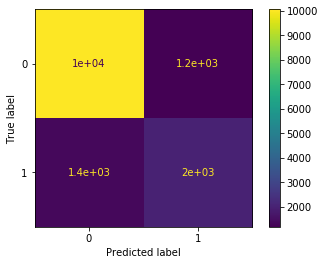

In [19]:
report_result(knn_clf, y_test, predicted)

#### Train the classifier for different K,

### k=7

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11233
           1       0.65      0.59      0.62      3420

    accuracy                           0.83     14653
   macro avg       0.76      0.75      0.75     14653
weighted avg       0.82      0.83      0.83     14653


Confusion matrix:
[[10120  1113]
 [ 1395  2025]]


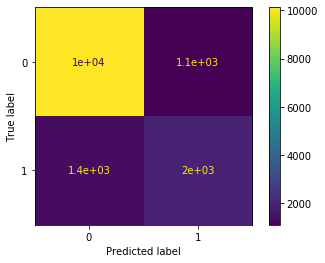

In [20]:
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(x_train, y_train)
predicted = knn_clf.predict(x_test)
report_result(knn_clf, y_test, predicted)

### plotting change of score w.r.t. other k:

In [21]:
n = [2, 4, 5, 7, 9, 11]
knn_scores = []
for k in n:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(x_train, y_train)
    knn_scores.append(knn_clf.score(x_test, y_test))

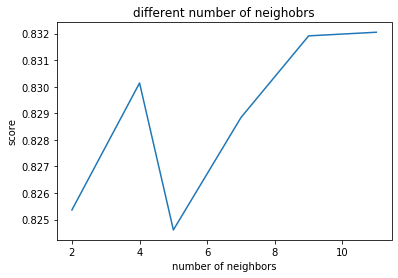

In [22]:
plt.plot(n, knn_scores)
plt.ylabel('score')
plt.xlabel('number of neighbors')
plt.title('different number of neighobrs');

### So we see that 4 has best performance

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     11233
           1       0.69      0.50      0.58      3420

    accuracy                           0.83     14653
   macro avg       0.77      0.71      0.74     14653
weighted avg       0.82      0.83      0.82     14653


Confusion matrix:
[[10469   764]
 [ 1725  1695]]


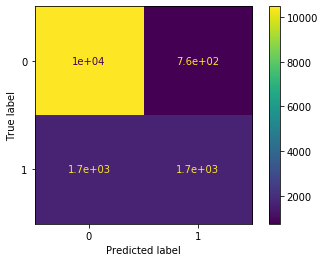

In [36]:
knn_clf = KNeighborsClassifier(n_neighbors=4)
knn_clf.fit(x_train, y_train)
predicted = knn_clf.predict(x_test)
report_result(knn_clf, y_test, predicted)

## Parzen

#### now train a kernerDensity model with diffrent kernels,

In [23]:
from sklearn.neighbors import KernelDensity

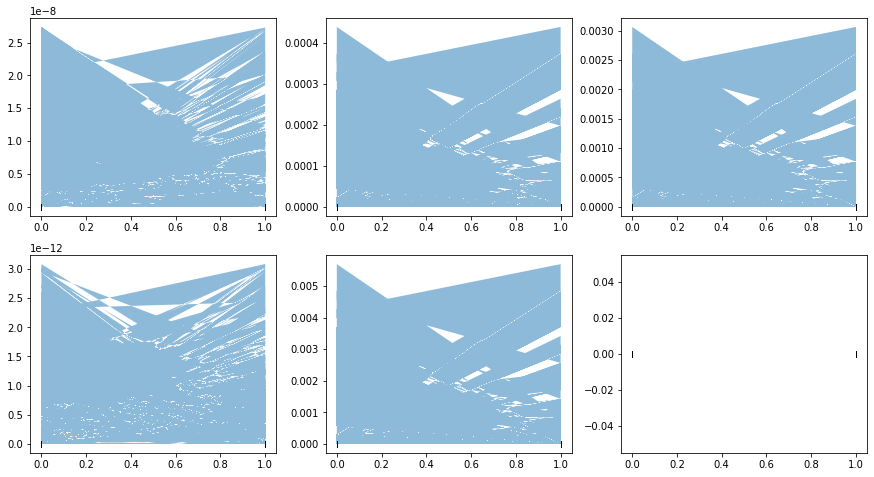

In [49]:
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
fig, axs = plt.subplots(2,3, figsize=(15,8))
ax = axs.flatten()
for i in range(len(kernels)):
    kde = KernelDensity(bandwidth=1.0, kernel=kernels[i])
    kde.fit(x_train)
    logprob = kde.score_samples(x_test)
    ax[i].fill_between(y_test, np.exp(logprob), alpha=0.5)
    ax[i].plot(y_test, np.full_like(x_test, -0.01), '|k', markeredgewidth=1)
#     plt.ylim(-0.02, 0.22)

## Decision Tree

In [26]:
from sklearn import tree

#### train a decision tree model with find its accuracy

In [27]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(x_train, y_train)
y_pred = tree_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8180577356172798


#### Now change the model parameters to optimize it.

In [48]:
tree_clf = tree.DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=30, max_features=2)
tree_clf = tree_clf.fit(x_train, y_train)
y_pred = tree_clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.855114993516686


#### We see that the accuracy is better that before

### Boosting

#### train a Boosting model for diffrrent max depth and different learning rate and find its accuracy for validation set 

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}\n".format(gb_clf.score(x_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.778
Accuracy score (validation): 0.785

Learning rate:  0.075
Accuracy score (training): 0.808
Accuracy score (validation): 0.817

Learning rate:  0.1
Accuracy score (training): 0.815
Accuracy score (validation): 0.823

Learning rate:  0.25
Accuracy score (training): 0.827
Accuracy score (validation): 0.835

Learning rate:  0.5
Accuracy score (training): 0.846
Accuracy score (validation): 0.854

Learning rate:  0.75
Accuracy score (training): 0.855
Accuracy score (validation): 0.860

Learning rate:  1
Accuracy score (training): 0.854
Accuracy score (validation): 0.860

